# Covid-19 Data Analysis  

Jupyter notebook is a great tool for data scientists who is working on Covid-19 data analysis.

COVID-19, first identified in Wuhan City, Hubei Province, China, has spread worldwide with over 40 million infected and 1 million deceased. Amongst governments worldwide fighting COVID-19, The United States, has been remarkably effective at the New York times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak. The data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020. We will publish regular updates to the data.

### Here is the coverage of this notebook:
 1. implement Covid-19 tracker dataset using Pandas DataFrame
 2. implement Data Cleaning and Preprocessing using Pandas & Numpy
 3. implement Data Exploration and Data Visualization using Matplotlib


### Download Covid-19 tracker Dataset
##### http://covidtracking.com/api/states/daily.csv

## 1. Data Loading and Discovery

In [ ]:
#install libraries need
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [1]:
#import libraries needs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read datasets using Pandas Datafram
df = pd.read_csv('Daily.csv')

In [3]:
#presentation of first 5 row in dataset
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210304,AK,56745.0,NaN,NaN,NaN,totalTestsViral,1724484.0,32.0,1290.0,...,NaN,0,5,bc7a5cc276540e2ec8f649ab256aa42f63777463,0,0,0,0,0,NaN
1,20210304,AL,498076.0,107404.0,1920535.0,NaN,totalTestsPeopleViral,2311207.0,544.0,45807.0,...,NaN,65,84,45b26555b46ec5f1a3ffcb116d0be102a0581a08,0,0,0,0,0,NaN
2,20210304,AR,323756.0,68813.0,2464286.0,NaN,totalTestsViral,2719229.0,397.0,14876.0,...,NaN,12,50,a9cab41a8c2014380e4a91e6d95203151bf10bce,0,0,0,0,0,NaN
3,20210304,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,0522d89dc5db26466f6b16e91ebe46bd9e02d43b,0,0,0,0,0,NaN
4,20210304,AZ,821108.0,55604.0,3032112.0,NaN,totalTestsViral,7775843.0,1072.0,57747.0,...,NaN,96,50,d6cff248209af76d6c668ae6bd9ebe30960f94c6,0,0,0,0,0,NaN


In [4]:
#Show general information of all dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20612 entries, 0 to 20611
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20612 non-null  int64  
 1   state                        20612 non-null  object 
 2   positive                     20416 non-null  float64
 3   probableCases                9110 non-null   float64
 4   negative                     14216 non-null  float64
 5   pending                      2124 non-null   float64
 6   totalTestResultsSource       20612 non-null  object 
 7   totalTestResults             20454 non-null  float64
 8   hospitalizedCurrently        17179 non-null  float64
 9   hospitalizedCumulative       12777 non-null  float64
 10  inIcuCurrently               11408 non-null  float64
 11  inIcuCumulative              3756 non-null   float64
 12  onVentilatorCurrently        9026 non-null   float64
 13  onVentilatorCumu

In [5]:
#describe all statistical values
df.describe()

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,2.061200e+04,2.041600e+04,9110.000000,1.421600e+04,2124.000000,2.045400e+04,17179.000000,12777.000000,11408.000000,3756.000000,...,2.061200e+04,0.0,20612.000000,20612.000000,20612.0,20612.0,20612.0,20612.0,20612.0,0.0
mean,2.020238e+07,1.623616e+05,21255.997366,8.260504e+05,1652.720339,2.151008e+06,1194.432156,11214.737497,353.405505,1914.921991,...,7.305408e+05,NaN,24.762663,42.431545,0.0,0.0,0.0,0.0,0.0,NaN
std,3.552556e+03,3.214248e+05,44533.537385,1.291877e+06,4678.042165,4.362439e+06,2066.228641,17520.197639,587.678707,1934.760279,...,1.284546e+06,NaN,60.101147,210.775613,0.0,0.0,0.0,0.0,0.0,NaN
min,2.020011e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,...,0.000000e+00,NaN,-201.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,2.020060e+07,5.661250e+03,798.000000,5.835475e+04,43.000000,1.017535e+05,168.000000,1027.000000,60.000000,494.000000,...,3.345000e+04,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,2.020090e+07,4.531450e+04,4439.000000,3.059720e+05,211.000000,6.435995e+05,533.000000,4886.000000,169.000000,1285.000000,...,2.358955e+05,NaN,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,2.020120e+07,1.748992e+05,19126.750000,1.031066e+06,1285.500000,2.231297e+06,1284.000000,12862.000000,373.000000,2438.250000,...,8.368615e+05,NaN,24.000000,38.000000,0.0,0.0,0.0,0.0,0.0,NaN
max,2.021030e+07,3.488467e+06,362318.000000,1.009635e+07,64400.000000,4.914768e+07,22851.000000,89995.000000,5225.000000,9221.000000,...,1.116440e+07,NaN,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN


## 2. Data Cleaning and Preprocessing

In [6]:
#formate date
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')
df

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-04,AK,56745.0,NaN,NaN,NaN,totalTestsViral,1724484.0,32.0,1290.0,...,NaN,0,5,bc7a5cc276540e2ec8f649ab256aa42f63777463,0,0,0,0,0,NaN
1,2021-03-04,AL,498076.0,107404.0,1920535.0,NaN,totalTestsPeopleViral,2311207.0,544.0,45807.0,...,NaN,65,84,45b26555b46ec5f1a3ffcb116d0be102a0581a08,0,0,0,0,0,NaN
2,2021-03-04,AR,323756.0,68813.0,2464286.0,NaN,totalTestsViral,2719229.0,397.0,14876.0,...,NaN,12,50,a9cab41a8c2014380e4a91e6d95203151bf10bce,0,0,0,0,0,NaN
3,2021-03-04,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,0522d89dc5db26466f6b16e91ebe46bd9e02d43b,0,0,0,0,0,NaN
4,2021-03-04,AZ,821108.0,55604.0,3032112.0,NaN,totalTestsViral,7775843.0,1072.0,57747.0,...,NaN,96,50,d6cff248209af76d6c668ae6bd9ebe30960f94c6,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20607,2020-01-17,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,NaN
20608,2020-01-16,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,NaN
20609,2020-01-15,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,NaN
20610,2020-01-14,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,1881c8a2f0d337b22066b4f05df06eb2259e8d57,0,0,0,0,0,NaN


In [7]:
#check if any Columns contain NaN and How many NaN ?
def checkNa(df):
    #init variable to count na
    sumna = 0
    #loop to iterate over all columns
    for i in df.columns:
        #count all an in each column
        sumna = df[i].isna().sum()
        #check if sumna value grater than 0 then it print value with column
        if sumna > 0: print('find {} na in Column {} '.format(sumna,i))


In [8]:
#call function
checkNa(df) 

find 196 na in Column positive 
find 11502 na in Column probableCases 
find 6396 na in Column negative 
find 18488 na in Column pending 
find 158 na in Column totalTestResults 
find 3433 na in Column hospitalizedCurrently 
find 7835 na in Column hospitalizedCumulative 
find 9204 na in Column inIcuCurrently 
find 16856 na in Column inIcuCumulative 
find 11586 na in Column onVentilatorCurrently 
find 19331 na in Column onVentilatorCumulative 
find 8712 na in Column recovered 
find 613 na in Column lastUpdateEt 
find 613 na in Column dateModified 
find 613 na in Column checkTimeEt 
find 871 na in Column death 
find 7835 na in Column hospitalized 
find 17569 na in Column hospitalizedDischarged 
find 613 na in Column dateChecked 
find 6372 na in Column totalTestsViral 
find 11705 na in Column positiveTestsViral 
find 15606 na in Column negativeTestsViral 
find 6724 na in Column positiveCasesViral 
find 11238 na in Column deathConfirmed 
find 13120 na in Column deathProbable 
find 15423 na i

In [9]:
#Drops unnecessary column
df.drop(['pending','dataQualityGrade','onVentilatorCurrently','onVentilatorCumulative','hash','commercialScore','negativeRegularScore','negativeScore','positiveScore','score','grade','inIcuCumulative','hospitalizedDischarged','probableCases','positiveTestsViral'],axis=1,inplace=True)
df.drop(['negativeTestsViral','positiveCasesViral','deathConfirmed','deathProbable','totalTestEncountersViral','totalTestsPeopleViral','totalTestsPeopleAntigen','positiveTestsPeopleAntigen','totalTestsAntigen','dateChecked','dateModified'],axis=1,inplace=True)
df.drop(['totalTestsAntibody','positiveTestsAntibody','negativeTestsAntibody','totalTestsPeopleAntibody','positiveTestsPeopleAntibody','negativeTestsPeopleAntibody','positiveTestsAntigen','inIcuCurrently','hospitalizedCumulative'],axis=1,inplace=True)

In [10]:
#remove all NaN in Columns Positive, Negative using And gate
df = df[np.logical_and(df['positive'].notna , df['negative'].notna())]
checkNa(df)

find 3 na in Column positive 
find 65 na in Column totalTestResults 
find 2573 na in Column hospitalizedCurrently 
find 5029 na in Column recovered 
find 241 na in Column lastUpdateEt 
find 241 na in Column checkTimeEt 
find 420 na in Column death 
find 5044 na in Column hospitalized 
find 4483 na in Column totalTestsViral 


In [11]:
#fill all na in all columns with 0 value
df.fillna(value=0, inplace=True)
#display first 5 rows    
df.head()

C:\Users\Rocket\Anaconda3\envs\venv\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,date,state,positive,negative,totalTestResultsSource,totalTestResults,hospitalizedCurrently,recovered,lastUpdateEt,checkTimeEt,...,hospitalized,totalTestsViral,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease
1,2021-03-04,AL,498076.0,1920535.0,totalTestsPeopleViral,2311207.0,544.0,295690.0,3/4/2021 11:00,03/04 06:00,...,45807.0,0.0,1,922,4990,2418611,5890,2418611,65,84
2,2021-03-04,AR,323756.0,2464286.0,totalTestsViral,2719229.0,397.0,314207.0,3/4/2021 00:00,03/03 19:00,...,14876.0,2719229.0,5,403,8977,2788042,9283,2788042,12,50
3,2021-03-04,AS,0.0,2140.0,totalTestsViral,2140.0,0.0,0.0,12/1/2020 00:00,11/30 19:00,...,0.0,2140.0,60,0,0,2140,0,2140,0,0
4,2021-03-04,AZ,821108.0,3032112.0,totalTestsViral,7775843.0,1072.0,0.0,3/4/2021 00:00,03/03 19:00,...,57747.0,7775843.0,4,1154,9402,3853220,36482,3853220,96,50
6,2021-03-04,CO,433021.0,2188741.0,totalTestEncountersViral,6310233.0,355.0,0.0,3/4/2021 01:59,03/03 20:59,...,23791.0,0.0,8,1351,5603,2621762,36564,2621762,4,56


In [12]:
#check if any na values
checkNa(df)

## 3. Data Exploration and Data Visualization

In [13]:
def plotOnDate(var='positiveIncrease',date='2020-03-26'):
    """
    steps:	
        1- select all rows in specific date (2020-03-26)
        2- select 2 columns like [positiveIncrease , state] 
        3- plot bar graph which x-axis (state) and y-axis (positiveIncrease)
    """
    y = df[df['date']==date][var]
    x = df[df['date']==date]['state']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,'state'),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='blue')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()


### Q1- Where new cases are increase and staying high ?

to answer this question you want to select 3 column (date, state, positive increase)

so I made function select positive increase column depend on date column and state column and used Matplotlib library to show the result on screen

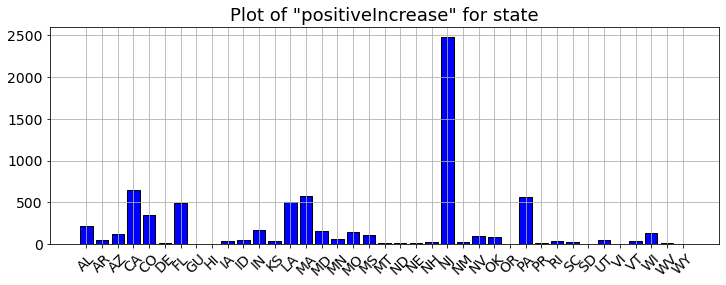

In [14]:
# we called the function to caclulate using the default date, you can pass the date explicitly to the function 
positiveIncrease = plotOnDate()

### Q2- Where new cases are going down ?

to answer this question you want to select 3 column (date, state, negative increase)

so I made function select negative increase column depend on date column and state column and used Matplotlib library to show the result on the screen

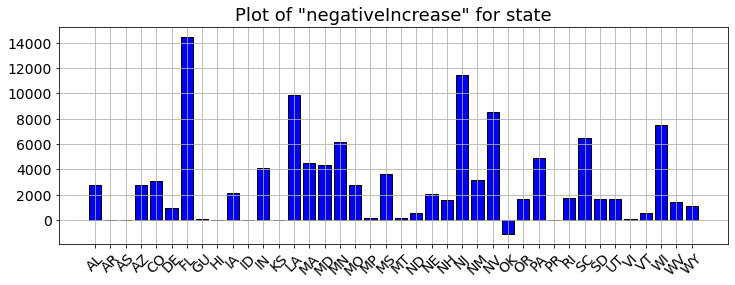

In [15]:
decreaseincrease = plotOnDate('negativeIncrease','2020-05-26')

### Q3- Where new cases are the lowest ?

so now I think I should select 3 columns (date, state, negative)

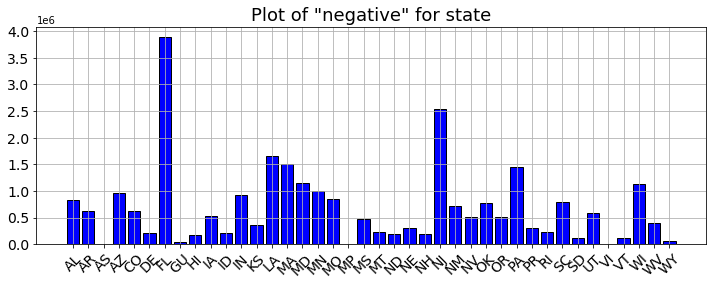

In [16]:
negative = plotOnDate('negative','2020-08-26')

### Q4- Where new cases are the highest ?

so now I think I should select 3 columns (date, state, positive)

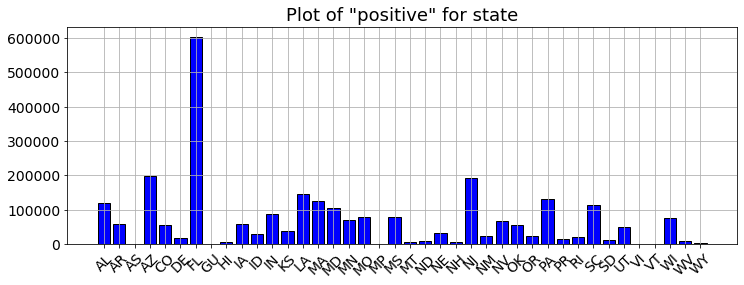

In [17]:
positive = plotOnDate('positive','2020-08-26')

In [18]:
def plotDepOnState(var='hospitalized', state='SD'):
    """
    steps:	
        1- select all rows in specific state (South Dakota state)
        2- select 2 columns like [positive , date] 
        3- plot bar graph which x-axis (date) and y-axis (positive)
    """
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='blue')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

### Q5- How many hospitalized Covid-19 patients by day for South Dakota state ?

so you can select 2 columns (date, hospitalized) in South Dakota sate

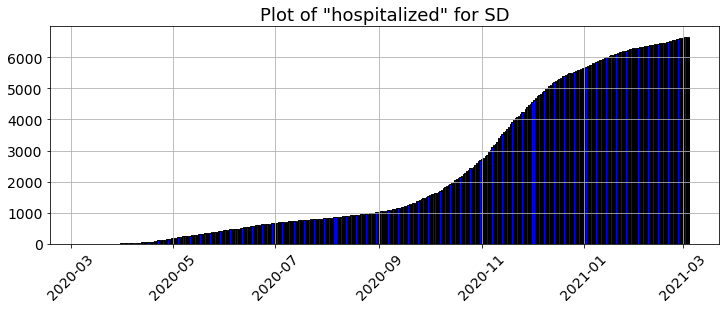

In [19]:
hospitalized = plotDepOnState()

In [20]:
def ratios(state='SD',ratioabout=['positive','totalTestResults']):
    """
    steps:
    1- select column date and get all values
    2- select specific state (South Dakota)
    3-get all state values of 2 columns in this date ['positive','totalTestResults']
    4- divide all value of two columns and multiply by 100 
        """
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)][ratioabout[0]])
        p = float(df[(df['state']==state) & (df['date']==date)][ratioabout[1]])     
        return (round(r/p,3) * 100)
    except:
        return -1

### Q6- What is the ratio of positive and total Test Results in South Dakota state ?

so you must select date , positive and total test then you must select positive and total

value depend on state and time

In [21]:
print(str(ratios())+" %")

16.2 %


### Q7- What is the ratio of positive people become recovered in Arkansas state ?

so you can select 2 columns (positive , recovered) depend on date and state

In [22]:
print(str(ratios('AR',['recovered','positive']))+" %")

97.1 %


### Q8- What is the ratio of positive people who become recovered in the Top 10 recovered states?

so you can think that first, you want to select a specific date, select recovered column to
sort it in descending order then get the Top 10 states using NumPy to change 
the datatype to an array

In [23]:
def getmaxtenstates(date = '2021-03-04',column='recovered'):
    """
    steps:
    1- select specific column date and get all corresponding values
    2- sort all recovered column in descending order
    3- select top 10 unique state that have high recovered  
    """
    dfs = df[df['date']==date]
    dfs = dfs.sort_values(by=[column],ascending=False).head(10)
    dfs = np.array(dfs['state'])
    return dfs


In [24]:
getmaxtenstates()

array(['PA', 'WI', 'MA', 'MN', 'LA', 'OK', 'UT', 'IA', 'AR', 'AL'],
      dtype=object)

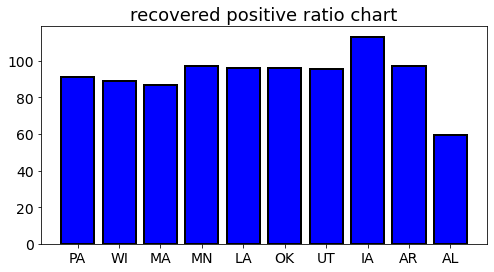

In [26]:
"""
steps:
1- call function getmaxtenstates to get top 10 states 
2- call function ratio to calculate ratio between ['recovered','positive'] in all 10 states
3-if it get any error return -1 else append ratios data with state in 2 lists 
4- plot bar graph of 10 states with x-axis(state) and y-axis(ratios) 
"""
states = getmaxtenstates()
tp,x = [],[]
for s in states:
    data = ratios(s,['recovered','positive'])
    if(data != -1):
        tp.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("recovered positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue', edgecolor='k',linewidth=2)
plt.show()